# Value iteration + policy extraction and policy iteration applied to simple grid world problem described below.

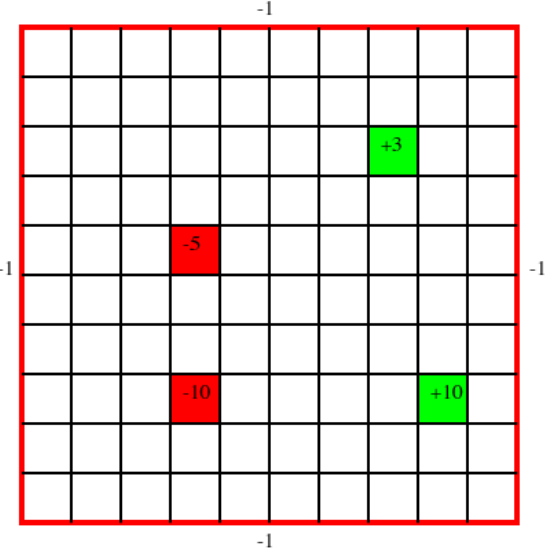




This is 10×10 grid world, where the robot can choose one of four actions: up, down, left, or right. If the agent carries out one of these actions, it has a 70% chance of going one step in the desired direction and a 10% chance of going one step in any of the other three directions. If it bumps into the outside wall, there is a penalty of 1 and the agent does not move. Position (0,0) is at north-west corner and position (9,9) at south-east corner. Position (x,y) means x steps to south and y steps to east starting from (0,0).  

The four rewarding states are
* +10 at position (7,8)
* +3 at position (2,7)
* -5 at position (4,3) 
* -10 at position (7,3).

In each of these states, the agent gets the reward after it carries out an action in that state, not when it enters the state. When the agent reaches the state (7,8), no matter what it does at the next step, it is flung, at random, to one of the four corners of the grid world.




# 1.Value iteration and policy extraction

In [70]:
import numpy as np
import pandas as pd 
import random as rd
import matplotlib.pyplot as plt




#actions are numbered as 0=up, 1=left, 2=down and 3=right


In [27]:
def giveReward(i,j,act):
    if i==2 and j==7:
        reward=3
    elif i==7 and j==8:
        reward=10
    elif i==4 and j==3:
        reward=-5
    elif i==7 and j==3:
        reward=-10
    elif (i==0 and act==0) or \
        (i==9 and act==2) or \
        (j==0 and act==1)or \
        (j==9 and act==3):
        reward=-1
    else:
        reward=0
    return reward


def giveNextState(i,j,act):
    if i==7 and j==8:
        new_random_state=rd.randint(0,3)
        next_i,next_j=[[0,0], [0,9], [9,0], [9,9]][new_random_state]
    else:
        next_i=i
        next_j=j
        if act==0:
            next_i=i+1
        elif act==1:
            next_j=j-1
        elif act==2:
            next_i=i-1
        else:
            next_j=j+1
        if next_i>9:
            next_i=9
        if next_i<0:
            next_i=0
        if next_j>9:
            next_j=9
        if next_j<0:
            next_j=0

    return [next_i,next_j]

    
    

In [44]:
#storing only V-values

#array for Values
V=np.zeros([10,10])


discount=0.9
tolerance=0.1
iterations=500

#value iteration
cond=True
iter_count=0
while cond==True:
    Vtemp=np.zeros([10,10])
    for i in range(10):
        for j in range(10):
            values=np.zeros([4,1])
            for act in range(4):
                temp=0
                for resultDir in range(4):
                    reward=giveReward(i,j,resultDir)
                    next_i=giveNextState(i,j,resultDir)[0]
                    next_j=giveNextState(i,j,resultDir)[1]
                    if resultDir==act:
                        prob=0.7
                    else:
                        prob=0.1
                    temp+= prob*(reward + discount*V[next_i,next_j])
                values[act]=temp
            Vtemp[i,j]=np.max(values)
    maxError=np.max(np.abs(V - Vtemp))
    V=Vtemp
    
    iter_count+=1
    if maxError<tolerance or iter_count>=iterations:
        cond=False
    
#extract optimal policy


optimal_pol=np.zeros([10,10])
for i in range(10):
    for j in range(10):
        values=np.zeros([4,1])
        for act in range(4):
                temp=0
                for resultDir in range(4):
                    reward=giveReward(i,j,resultDir)
                    next_i=giveNextState(i,j,resultDir)[0]
                    next_j=giveNextState(i,j,resultDir)[1]
                    if resultDir==act:
                        prob=0.7
                    else:
                        prob=0.1
                    temp+= prob*(reward + discount*V[next_i,next_j])
                values[act]=temp
        optimal_pol[i,j]=np.argmax(values)
        
optimal_pol

array([[3., 3., 3., 3., 3., 3., 3., 0., 1., 1.],
       [3., 3., 3., 3., 3., 3., 0., 0., 0., 1.],
       [3., 3., 3., 3., 3., 3., 3., 0., 1., 1.],
       [3., 3., 3., 3., 3., 3., 3., 2., 1., 0.],
       [3., 2., 2., 3., 3., 3., 3., 2., 0., 0.],
       [3., 3., 3., 3., 3., 3., 3., 0., 0., 0.],
       [3., 3., 3., 3., 3., 3., 3., 3., 0., 0.],
       [3., 2., 2., 3., 3., 3., 3., 3., 1., 1.],
       [3., 3., 3., 3., 3., 3., 3., 2., 2., 2.],
       [3., 3., 3., 3., 3., 3., 3., 3., 2., 1.]])

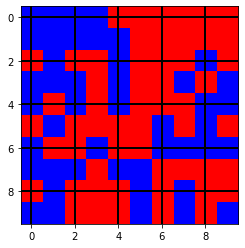

In [34]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

data = np.random.rand(10, 10) * 20

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0, 10, 2));
ax.set_yticks(np.arange(0, 10, 2));

plt.show()

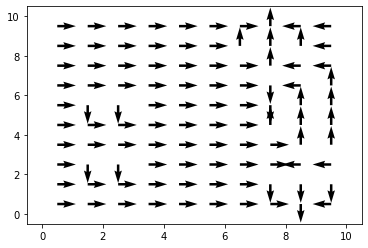

In [45]:
def optimalPolicy(x):
    for i in range(10):
         for j in range(10):
                x_coord=0.5+j
                y_coord=9.5-i
                if x[i,j]==0:
                     plt.quiver(x_coord,y_coord,0,0.5)
                elif x[i,j]==1:
                     plt.quiver(x_coord,y_coord,-0.5,0)
                elif x[i,j]==2:
                     plt.quiver(x_coord,y_coord,0,-0.5)
                else:
                     plt.quiver(x_coord,y_coord,0.5,0)
    #plt.gca().axes.get_yaxis().set_visible(False)
    #plt.gca().axes.get_xaxis().set_visible(False)
    _=plt.gca().set_xlim([-0.5,10.5])
    _=plt.gca().set_ylim([-0.5,10.5])
    
    
optimalPolicy(optimal_pol)    

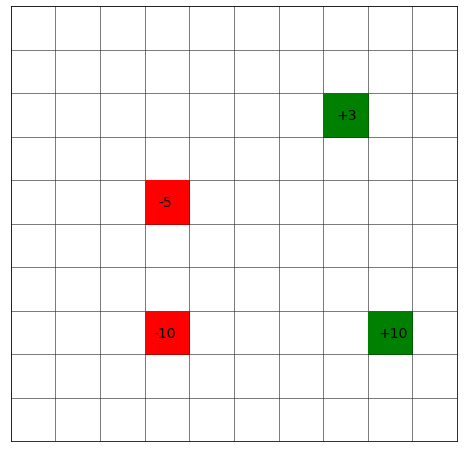

In [244]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0,10)
ax.set_ylim(0,10)

for i in range(10):
    for j in range(10): 
        if (i==2 and j==7): 
            rect = plt.Rectangle((j,9-i), 1, 1, color='g')
            ax.annotate('+3', (j+0.3,9-i+0.4),fontsize=14)
        elif (i==7 and j==8):
            rect = plt.Rectangle((j,9-i), 1, 1, color='g')
            ax.annotate('+10', (j+0.25,9-i+0.4),fontsize=14)
            
        elif (i==4 and j==3):
            rect = plt.Rectangle((j,9-i), 1, 1, color='r')
            ax.annotate('-5', (j+0.3,9-i+0.4),fontsize=14)
        elif (i==7 and j==3):
            rect = plt.Rectangle((j,9-i), 1, 1, color='r')
            ax.annotate('-10', (j+0.2,9-i+0.4),fontsize=14)
            
        else:
            rect = plt.Rectangle((j,9-i), 1, 1, alpha=0.3, fill=False)
        ax.add_patch(rect)
        #ax.add_patch(text)

ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
